In [421]:
import pandas as pd
import numpy as np

In [422]:
trainDF= pd.read_csv('train.csv')
pd.set_option('display.max_rows', 200)
trainDF.head()
trainDF.rename( columns={'Unnamed: 0':'Sno'}, inplace=True )

In [423]:
#After the analysis of the data , few new columns could be created.


In [424]:
print("Shape of the Training data :", trainDF.shape)

Shape of the Training data : (100000, 9)


In [425]:
print("All columns are :", list(trainDF.columns))

All columns are : ['Sno', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [426]:
trainDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sno                100000 non-null  int64  
 1   key                100000 non-null  object 
 2   fare_amount        100000 non-null  float64
 3   pickup_datetime    100000 non-null  object 
 4   pickup_longitude   100000 non-null  float64
 5   pickup_latitude    100000 non-null  float64
 6   dropoff_longitude  100000 non-null  float64
 7   dropoff_latitude   100000 non-null  float64
 8   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 6.9+ MB


#### This data set has 9 attributes and 100000 data values to train on.


#### This data does not have null values as could be seen in  here since the shape and non-null count is equal.

In [427]:
trainDF.describe()


,Sno,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,11.333564,-72.448815,39.887315,-72.479259,39.890066,1.682150
std,28867.657797,9.810826,10.869743,6.383817,12.774264,6.260724,1.308617
min,0.000000,-9.300000,-736.516667,-74.015935,-2319.633333,-74.011085,0.000000
25%,24999.750000,6.000000,-73.992133,40.734793,-73.991443,40.734034,1.000000
50%,49999.500000,8.500000,-73.981850,40.752464,-73.980214,40.753093,1.000000
75%,74999.250000,12.500000,-73.967172,40.767032,-73.963718,40.768042,2.000000
max,99999.000000,394.000000,40.801777,404.666667,40.787037,44.640672,6.000000


In [428]:
negative_fare = []
for row in trainDF.itertuples():
    if float(row.fare_amount) < 0 :
        negative_fare.append(row[0])
        trainDF.drop(row[0], inplace=True)
print(negative_fare)
        

[38446, 38582, 61165]


In [429]:
zero_passenger = []
for row in trainDF.itertuples():
    if int(row.passenger_count) == 0 :
        zero_passenger.append(row[0])
        trainDF.drop(row[0], inplace=True)
print(zero_passenger)
df = trainDF.copy(deep=True) 
        

[198, 208, 261, 903, 1168, 1921, 2147, 2305, 2458, 2476, 2574, 2803, 4120, 4285, 4453, 4528, 4718, 5032, 5188, 5339, 6209, 7052, 7451, 7795, 8363, 8536, 8797, 9943, 10240, 10246, 10296, 10541, 11266, 11303, 11593, 11700, 12208, 12796, 12999, 13173, 13230, 13334, 13721, 13767, 13865, 14248, 14417, 14490, 14515, 14759, 14819, 14855, 15029, 15210, 15534, 16317, 16322, 16406, 16898, 16983, 17110, 17123, 17786, 17987, 18011, 18584, 18657, 18717, 19010, 19074, 19081, 19162, 19163, 20229, 20585, 20604, 20837, 21065, 21284, 21777, 22158, 23092, 23095, 23238, 23363, 23381, 23507, 23803, 23838, 24092, 24135, 24174, 24246, 24371, 24801, 25635, 25952, 26411, 26506, 27125, 27131, 27638, 27657, 27923, 27981, 28372, 28666, 28744, 29450, 29638, 29929, 29971, 30615, 30894, 31050, 31120, 31219, 31821, 32198, 32207, 32291, 33042, 33260, 33392, 33401, 33592, 33734, 33997, 34084, 34134, 34396, 34545, 34575, 34740, 35132, 35254, 35399, 35499, 36338, 36387, 37034, 37278, 37333, 37820, 37898, 38248, 38505, 38

In [430]:
'''Here we intend to analyse the data based on the lattidues and longitudes provided in the data,
We take a box range of lattitdue and longitude values that covers New York and nearby areas and remove all the values that lie outside the region
Also we calculate the distance covered in each ride to analyse the costs
'''
import haversine as hs

distance = []
outliers_cordi = []
for row in trainDF.itertuples():
    if (40<=row.dropoff_latitude<=42) and (40<=row.pickup_latitude<=42) and (-76<=row.pickup_longitude<=-73) and (-76<=row.dropoff_longitude<=-73):
        
       pic=(row.pickup_latitude,row.pickup_longitude)
       drop=(row.dropoff_latitude,row.dropoff_longitude)
       dist = hs.haversine(pic,drop)
       distance.append(dist)
    else :
        outliers_cordi.append(row[0])
        trainDF.drop(row[0], inplace=True)

                
trainDF["Distance_travelled_km"] = distance

trainDF.head(10)

,Sno,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_travelled_km
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2,1.116851
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2,1.055054
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1,2.715962
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1,5.101377
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5,4.800600
5,5,2009-10-07 08:40:00.00000096,21.3,2009-10-07 08:40:00 UTC,-73.958883,40.780737,-73.995530,40.723353,1,7.088310
6,6,2011-06-21 20:19:00.000000216,8.1,2011-06-21 20:19:00 UTC,-73.987642,40.732658,-74.004502,40.707470,6,3.140587
7,7,2014-07-15 16:31:00.00000060,12.0,2014-07-15 16:31:00 UTC,-73.996637,40.725452,-73.978787,40.750765,1,3.191265
8,8,2010-12-07 13:47:39.0000001,11.3,2010-12-07 13:47:39 UTC,-73.968040,40.759881,-73.979779,40.755003,2,1.127759
9,9,2012-09-20 13:14:00.000000169,5.0,2012-09-20 13:14:00 UTC,-73.981982,40.752235,-73.983348,40.752432,1,0.117131


In [431]:
Amount_per_passenger = trainDF["fare_amount"]/trainDF["passenger_count"]    
trainDF["Fare_per_passenger"] = Amount_per_passenger


In [432]:
time = []
date = []
for row in trainDF.itertuples():
    date.append(row.pickup_datetime[0:10])
    time.append(row.pickup_datetime[10:])
trainDF["Time_of_Pickup"] = time
trainDF["Date_of_Pickup"] = date
trainDF.head(10)

,Sno,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_travelled_km,Fare_per_passenger,Time_of_Pickup,Date_of_Pickup
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2,1.116851,2.45,19:11:10 UTC,2009-04-08
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2,1.055054,2.45,16:19:08 UTC,2012-07-30
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1,2.715962,6.90,13:35:00 UTC,2011-02-22
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1,5.101377,14.10,21:09:35 UTC,2010-10-07
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5,4.800600,2.42,22:51:00 UTC,2009-10-02
5,5,2009-10-07 08:40:00.00000096,21.3,2009-10-07 08:40:00 UTC,-73.958883,40.780737,-73.995530,40.723353,1,7.088310,21.30,08:40:00 UTC,2009-10-07
6,6,2011-06-21 20:19:00.000000216,8.1,2011-06-21 20:19:00 UTC,-73.987642,40.732658,-74.004502,40.707470,6,3.140587,1.35,20:19:00 UTC,2011-06-21
7,7,2014-07-15 16:31:00.00000060,12.0,2014-07-15 16:31:00 UTC,-73.996637,40.725452,-73.978787,40.750765,1,3.191265,12.00,16:31:00 UTC,2014-07-15
8,8,2010-12-07 13:47:39.0000001,11.3,2010-12-07 13:47:39 UTC,-73.968040,40.759881,-73.979779,40.755003,2,1.127759,5.65,13:47:39 UTC,2010-12-07
9,9,2012-09-20 13:14:00.000000169,5.0,2012-09-20 13:14:00 UTC,-73.981982,40.752235,-73.983348,40.752432,1,0.117131,5.00,13:14:00 UTC,2012-09-20


In [433]:
#From above it could be observed that there are a lot of values

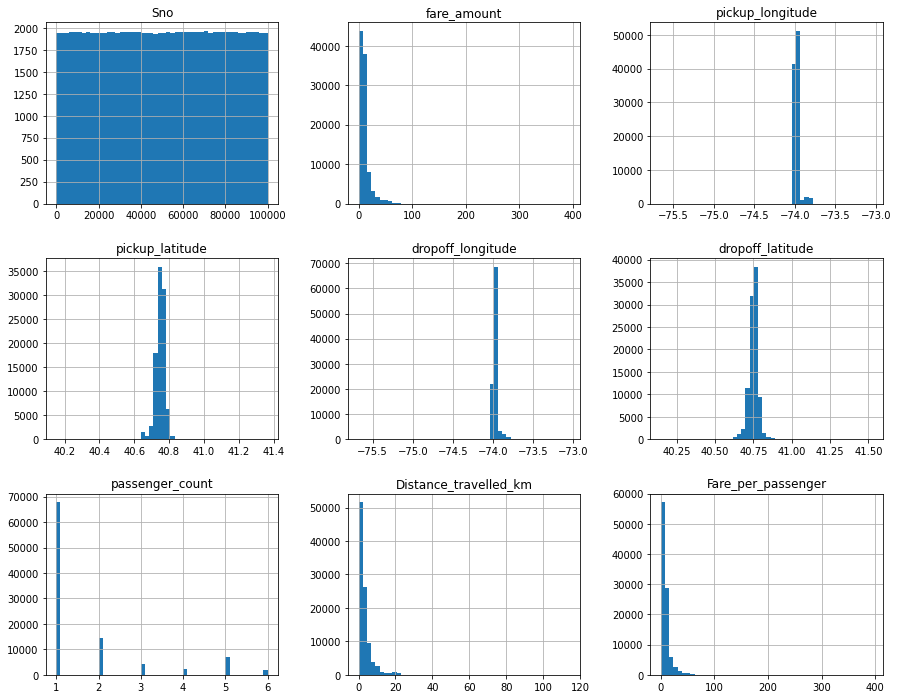

In [434]:
# Matplotlib is a very powerful module containing all kinds of data visualization tools
from matplotlib import pyplot as plt

# DataFrame.hist() creates histogram of every feature present in the DataFrame.
trainDF.hist(bins=50, figsize=(15,12))
plt.show()


In [435]:
'''import seaborn as sns

# Apply the default theme
sns.set_theme()

sns.pairplot(trainDF, hue ='fare_amount')
plt.show()'''

"import seaborn as sns\n\n# Apply the default theme\nsns.set_theme()\n\nsns.pairplot(trainDF, hue ='fare_amount')\nplt.show()"

<AxesSubplot:xlabel='Distance_travelled_km', ylabel='fare_amount'>

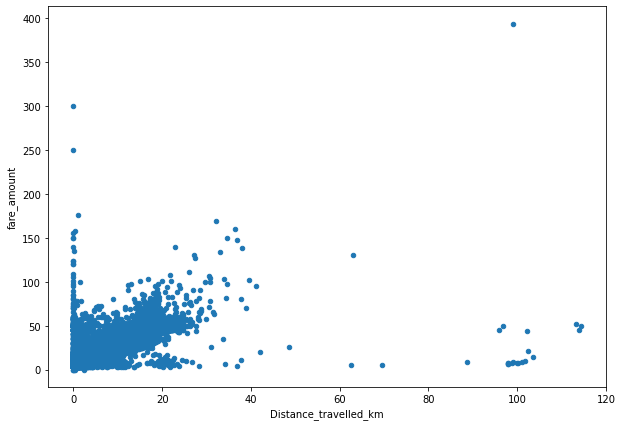

In [436]:
trainDF.plot(kind="scatter", x="Distance_travelled_km", y="fare_amount", figsize=(10, 7))

In [437]:
trainDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97482 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sno                    97482 non-null  int64  
 1   key                    97482 non-null  object 
 2   fare_amount            97482 non-null  float64
 3   pickup_datetime        97482 non-null  object 
 4   pickup_longitude       97482 non-null  float64
 5   pickup_latitude        97482 non-null  float64
 6   dropoff_longitude      97482 non-null  float64
 7   dropoff_latitude       97482 non-null  float64
 8   passenger_count        97482 non-null  int64  
 9   Distance_travelled_km  97482 non-null  float64
 10  Fare_per_passenger     97482 non-null  float64
 11  Time_of_Pickup         97482 non-null  object 
 12  Date_of_Pickup         97482 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 10.4+ MB


In [438]:
year = []
month = []
days = []
hours = []
minutes = []
sec = []
for row in trainDF.itertuples():
    year.append(row.Date_of_Pickup[0:4])
    month.append(row.Date_of_Pickup[5:7])
    days.append(row.Date_of_Pickup[8:10])
    hours.append(row.Time_of_Pickup[1:3])
    minutes.append(row.Time_of_Pickup[4:6])
    sec.append(row.Time_of_Pickup[7:9])
trainDF["Year"] = year
trainDF["Month"] = month
trainDF["Days"] = days
trainDF["Hours"] =hours
trainDF["Minutes"] = minutes
trainDF["Sec"] = sec
trainDF.head(10)

,Sno,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_travelled_km,Fare_per_passenger,Time_of_Pickup,Date_of_Pickup,Year,Month,Days,Hours,Minutes,Sec
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2,1.116851,2.45,19:11:10 UTC,2009-04-08,2009,04,08,19,11,10
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2,1.055054,2.45,16:19:08 UTC,2012-07-30,2012,07,30,16,19,08
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1,2.715962,6.90,13:35:00 UTC,2011-02-22,2011,02,22,13,35,00
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1,5.101377,14.10,21:09:35 UTC,2010-10-07,2010,10,07,21,09,35
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5,4.800600,2.42,22:51:00 UTC,2009-10-02,2009,10,02,22,51,00
5,5,2009-10-07 08:40:00.00000096,21.3,2009-10-07 08:40:00 UTC,-73.958883,40.780737,-73.995530,40.723353,1,7.088310,21.30,08:40:00 UTC,2009-10-07,2009,10,07,08,40,00
6,6,2011-06-21 20:19:00.000000216,8.1,2011-06-21 20:19:00 UTC,-73.987642,40.732658,-74.004502,40.707470,6,3.140587,1.35,20:19:00 UTC,2011-06-21,2011,06,21,20,19,00
7,7,2014-07-15 16:31:00.00000060,12.0,2014-07-15 16:31:00 UTC,-73.996637,40.725452,-73.978787,40.750765,1,3.191265,12.00,16:31:00 UTC,2014-07-15,2014,07,15,16,31,00
8,8,2010-12-07 13:47:39.0000001,11.3,2010-12-07 13:47:39 UTC,-73.968040,40.759881,-73.979779,40.755003,2,1.127759,5.65,13:47:39 UTC,2010-12-07,2010,12,07,13,47,39
9,9,2012-09-20 13:14:00.000000169,5.0,2012-09-20 13:14:00 UTC,-73.981982,40.752235,-73.983348,40.752432,1,0.117131,5.00,13:14:00 UTC,2012-09-20,2012,09,20,13,14,00


In [439]:
corr_matrix = trainDF.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount              1.000000
Fare_per_passenger       0.862872
Distance_travelled_km    0.800528
pickup_longitude         0.347188
dropoff_longitude        0.264311
passenger_count          0.014172
Sno                     -0.000136
dropoff_latitude        -0.148784
pickup_latitude         -0.186859
Name: fare_amount, dtype: float64

In [440]:
trainDF = trainDF.drop(['Sno', 'key','pickup_datetime','Date_of_Pickup','Time_of_Pickup','Fare_per_passenger'], axis=1)
trainDF.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_travelled_km,Year,Month,Days,Hours,Minutes,Sec
0,4.9,-73.998287,40.727490,-73.989854,40.735239,2,1.116851,2009,04,08,19,11,10
1,4.9,-73.966597,40.794345,-73.965682,40.803808,2,1.055054,2012,07,30,16,19,08
2,6.9,-73.971638,40.763382,-73.953767,40.783715,1,2.715962,2011,02,22,13,35,00
3,14.1,-74.003545,40.707399,-73.981312,40.750071,1,5.101377,2010,10,07,21,09,35
4,12.1,-74.004532,40.707465,-73.977908,40.745633,5,4.800600,2009,10,02,22,51,00


In [441]:
trainDF.max()

fare_amount                   394.0
pickup_longitude         -73.044891
pickup_latitude           41.366138
dropoff_longitude        -73.044891
dropoff_latitude          41.524688
passenger_count                   6
Distance_travelled_km    114.311464
Year                           2015
Month                            12
Days                             31
Hours                            23
Minutes                          59
Sec                              59
dtype: object

In [442]:
trainDF.min()

fare_amount                    0.0
pickup_longitude        -75.656882
pickup_latitude          40.152382
dropoff_longitude       -75.677442
dropoff_latitude         40.146368
passenger_count                  1
Distance_travelled_km          0.0
Year                          2009
Month                           01
Days                            01
Hours                           00
Minutes                         00
Sec                             00
dtype: object

In [443]:
Year = []
year_i = {"2009":1,"2010":2,"2011":3,"2012":4,"2013":5,"2014":6,"2015":7}
for row in trainDF.itertuples():
    Year.append(year_i[row.Year])
trainDF["Year"] = Year
trainDF.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_travelled_km,Year,Month,Days,Hours,Minutes,Sec
0,4.9,-73.998287,40.727490,-73.989854,40.735239,2,1.116851,1,04,08,19,11,10
1,4.9,-73.966597,40.794345,-73.965682,40.803808,2,1.055054,4,07,30,16,19,08
2,6.9,-73.971638,40.763382,-73.953767,40.783715,1,2.715962,3,02,22,13,35,00
3,14.1,-74.003545,40.707399,-73.981312,40.750071,1,5.101377,2,10,07,21,09,35
4,12.1,-74.004532,40.707465,-73.977908,40.745633,5,4.800600,1,10,02,22,51,00


In [444]:
#Minimal approach for normalization
#normalized_df=(trainDF-trainDF.min())/(trainDF.max()-trainDF.min())
#trainDF.head()

In [445]:
from sklearn import preprocessing

x = trainDF.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normal_DF = pd.DataFrame(x_scaled)
normal_DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.012437,0.634993,0.473825,0.641047,0.427238,0.2,0.009770,0.000000,0.272727,0.233333,0.826087,0.186441,0.169492
1,0.012437,0.647125,0.528906,0.650229,0.476986,0.2,0.009230,0.500000,0.545455,0.966667,0.695652,0.322034,0.135593
2,0.017513,0.645195,0.503396,0.654755,0.462409,0.0,0.023759,0.333333,0.090909,0.700000,0.565217,0.593220,0.000000
3,0.035787,0.632980,0.457272,0.644291,0.437999,0.0,0.044627,0.166667,0.818182,0.200000,0.913043,0.152542,0.593220
4,0.030711,0.632602,0.457327,0.645585,0.434779,0.8,0.041996,0.000000,0.818182,0.033333,0.956522,0.864407,0.000000


In [446]:
normal_DF.max()

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
dtype: float64

In [447]:
normal_DF.min()

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

In [448]:
trainDF.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_travelled_km,Year,Month,Days,Hours,Minutes,Sec
0,4.9,-73.998287,40.727490,-73.989854,40.735239,2,1.116851,1,04,08,19,11,10
1,4.9,-73.966597,40.794345,-73.965682,40.803808,2,1.055054,4,07,30,16,19,08
2,6.9,-73.971638,40.763382,-73.953767,40.783715,1,2.715962,3,02,22,13,35,00
3,14.1,-74.003545,40.707399,-73.981312,40.750071,1,5.101377,2,10,07,21,09,35
4,12.1,-74.004532,40.707465,-73.977908,40.745633,5,4.800600,1,10,02,22,51,00


In [449]:
# As our objective is to predict "fare_amount", we will treat it as label, 
# and this "fare_amount" will not be a part of feature anymore.
# We are seperating the label from features.
# here we are using a fresh df for pre-processing through pipeline


df = df[df.Sno.isin(outliers_cordi) == False]
df_cross = df.copy(deep=True) 

train_feature = df.drop("fare_amount", axis=1)   # Training feature
train_lable = df["fare_amount"].copy()           # Training label

train_lable.info()
train_feature.info()

<class 'pandas.core.series.Series'>
Int64Index: 97482 entries, 0 to 99999
Series name: fare_amount
Non-Null Count  Dtype  
--------------  -----  
97482 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97482 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sno                97482 non-null  int64  
 1   key                97482 non-null  object 
 2   pickup_datetime    97482 non-null  object 
 3   pickup_longitude   97482 non-null  float64
 4   pickup_latitude    97482 non-null  float64
 5   dropoff_longitude  97482 non-null  float64
 6   dropoff_latitude   97482 non-null  float64
 7   passenger_count    97482 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.7+ MB


In [450]:
df.head()

,Sno,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5


In [451]:
#Building a Pipeline


In [452]:
from sklearn.base import BaseEstimator, TransformerMixin

In [453]:
# Fill NULL values with median

class fill_mdn(BaseEstimator, TransformerMixin):
    # Taking which column to modify as "col" parameter
    def __init__(self, col):
        self.col = col
    
    # Fit just calculated the median value and stores it as class variable
    def fit(self, X, y=None):
        self.median = X[self.col].median()
        return self
    
    # Transform updates all NaN values with median
    def transform(self, X):
        return X.fillna(self.median)


In [454]:
train_feature.head()

,Sno,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5


In [455]:
from sklearn.metrics import mean_squared_error

from math import sqrt
def calc_rmse(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    return rmse

In [456]:
class add_features(BaseEstimator, TransformerMixin):
    # We are calculating three new features. we are taking which combinations to take or leave
    def __init__(self,Month=True,Year=True,Days=True,Hours=True,Minutes=True,Sec=True):

        self.Year = Year
        self.Month = Month
        self.Days = Days
        self.Hours = Hours
        self.Minutes = Minutes
        self.Sec = Sec
    
    # Fit have no work, as nothing to train or calclate
    def fit(self, X, y=None):
        return self
    
    # In transform, we are adding all new features
    def transform(self, X):
        year = []
        month = []
        days = []
        hours = []
        minutes = []
        sec = []
        
        for row in X.itertuples():
            year.append(row.pickup_datetime[0:4])
            month.append(row.pickup_datetime[5:7])
            days.append(row.pickup_datetime[8:10])
            hours.append(row.pickup_datetime[11:13])
            minutes.append(row.pickup_datetime[14:16])
            sec.append(row.pickup_datetime[17:19])
        X["Year"] = year
        X["Month"] = month
        X["Days"] = days
        X["Hours"] =hours
        X["Minutes"] = minutes
        X["Sec"] = sec
      
        return X

In [457]:
import haversine as hs

class dis_calc(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        distance = []
        outliers_cordi = []
        for row in X.itertuples():
            if (40<=row.dropoff_latitude<=42) and (40<=row.pickup_latitude<=42) and (-76<=row.pickup_longitude<=-73) and (-76<=row.dropoff_longitude<=-73):
        
                pic=(row.pickup_latitude,row.pickup_longitude)
                drop=(row.dropoff_latitude,row.dropoff_longitude)
                dist = hs.haversine(pic,drop)
                distance.append(dist)
            else :
                outliers_cordi.append(row[0])
                X.drop(row[0], inplace=True)

                
        X["Distance_travelled_km"] = distance
        return X




In [458]:

# This code  converts categorical data into absolute values and mergs with actual dataframe

class year_convert(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col # on which column, we need to perform our encoding on
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        Year = []
        year_i = {"2009":1,"2010":2,"2011":3,"2012":4,"2013":5,"2014":6,"2015":7}
        for row in X.itertuples():
            Year.append(year_i[row.Year])
        X["Year"] = Year
        return X

In [459]:
class normalizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        x = X.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        X = pd.DataFrame(x_scaled)
        return X

In [460]:
class dropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        X = X.drop(["Sno","key","pickup_datetime"],axis=1)
        return X

In [461]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# This is the main pipeline object, in which we are performing four tasks
# pipeline takes list of tuples of two values as (name of transform, transform object)
pipe_m = Pipeline([
    ('fillna', fill_mdn(col="passenger_count")),
    ('feature_adder', add_features()),
    ('year_encode', year_convert(col="Year")),
    ("Distance_calculate",dis_calc()),
    ("Dropping_columns", dropper()),
    ('Normalizer',normalizer())
])

train_prepared = pipe_m.fit_transform(train_feature)
train_prepared


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.634993,0.473825,0.641047,0.427238,0.2,0.000000,0.272727,0.233333,0.826087,0.186441,0.169492,0.009770
1,0.647125,0.528906,0.650229,0.476986,0.2,0.500000,0.545455,0.966667,0.695652,0.322034,0.135593,0.009230
2,0.645195,0.503396,0.654755,0.462409,0.0,0.333333,0.090909,0.700000,0.565217,0.593220,0.000000,0.023759
3,0.632980,0.457272,0.644291,0.437999,0.0,0.166667,0.818182,0.200000,0.913043,0.152542,0.593220,0.044627
4,0.632602,0.457327,0.645585,0.434779,0.8,0.000000,0.818182,0.033333,0.956522,0.864407,0.000000,0.041996
...,...,...,...,...,...,...,...,...,...,...,...,...
97477,0.647694,0.510779,0.655399,0.451022,0.0,1.000000,0.454545,0.233333,0.304348,0.084746,0.474576,0.010485
97478,0.716205,0.402328,0.683207,0.371733,0.0,0.500000,0.727273,0.533333,0.652174,0.152542,0.000000,0.070628
97479,0.641219,0.499005,0.639498,0.426675,0.0,0.666667,0.090909,0.033333,0.826087,0.033898,0.000000,0.024567
97480,0.651020,0.515555,0.644407,0.459400,0.0,0.666667,1.000000,0.900000,0.652174,0.745763,0.288136,0.018162


In [462]:
#Cross Validation

In [463]:
df_cross

,Sno,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5
...,...,...,...,...,...,...,...,...,...
99995,99995,2015-06-08 07:05:28.0000003,4.5,2015-06-08 07:05:28 UTC,-73.965111,40.772343,-73.952072,40.768021,1
99996,99996,2012-09-17 15:09:00.000000161,25.5,2012-09-17 15:09:00 UTC,-73.786162,40.640710,-73.878865,40.658735,1
99997,99997,2013-02-02 19:02:00.00000047,14.5,2013-02-02 19:02:00 UTC,-73.982023,40.758052,-73.993930,40.734462,1
99998,99998,2013-12-28 15:44:17.0000004,9.0,2013-12-28 15:44:17 UTC,-73.956423,40.778140,-73.981008,40.779568,1


In [464]:

from sklearn.linear_model import LinearRegression

df_cross = df_cross[df_cross.Sno.isin([3,4]) == False]

df_1 = df_cross.sample(frac=0.10)
df_cross = pd.concat([df_1, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)

df_2 = df_cross.sample(n=9748)
df_cross = pd.concat([df_2, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)

df_3 = df_cross.sample(n=9748)
df_cross = pd.concat([df_3, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)

df_4 = df_cross.sample(n=9748)
df_cross = pd.concat([df_4, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)


df_5 = df_cross.sample(n=9748)
df_cross = pd.concat([df_5, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)


df_6 = df_cross.sample(n=9748)
df_cross = pd.concat([df_6, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)

df_7 = df_cross.sample(n=9748)
df_cross = pd.concat([df_7, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)

df_8 = df_cross.sample(n=9748)
df_cross = pd.concat([df_8, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)

df_9 = df_cross.sample(n=9748)
df_cross = pd.concat([df_9, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)


df_10 = df_cross.sample(n=9748)
df_cross = pd.concat([df_10, df_cross])
df_cross=df_cross.drop_duplicates(keep=False)

error_a = []
df_array = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10]
df_array2 = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10]

for dfx in df_array :
    test_feature = dfx.drop("fare_amount", axis=1)   # Training feature
    test_lable = dfx["fare_amount"].copy()           # Training label
    df_array2.pop(0)
    train = pd.concat(df_array2)
    trn_feature = train.drop("fare_amount", axis=1)   # Training feature
    trn_lable = train["fare_amount"].copy()           # Training label
    
    train_preped = pipe_m.fit_transform(trn_feature)
    test_preped = pipe_m.fit_transform(test_feature)
    
    model = LinearRegression()
    model.fit(train_preped, trn_lable)
    test_prd = model.predict(test_preped)
    linear_rmse = calc_rmse(test_prd, test_lable)
    error_a.append(linear_rmse)
    df_array2.append(dfx)
print(error_a)


[10.457983902963042, 7.817824726743647, 12.11704099185756, 6.982451541880021, 15.474203430165783, 6.099069388619513, 18.937342382409458, 5.9010485155850825, 16.60377039203189, 14.009062284583315]


In [468]:
avg_err = sum(error_a)/10
print(avg_err)

11.43997975568393


In [465]:

from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(train_prepared, train_lable)



LinearRegression()

In [466]:


some_data = train_feature.iloc[:125]
some_lable = train_lable.iloc[:125]
some_data_prepared = pipe_m.transform(some_data)

print("Predictions:\t", list(model_1.predict(some_data_prepared)))
print("Actual Labels:\t", list(some_lable))


Predictions:	 [-24.737214399640543, -32.1764067780514, -9.8245151423028, 16.58569122662532, 13.81821194311362, 30.938924969388328, -2.3754470500835527, -1.3271367184798457, -24.1719733582784, -34.24178518262377, -14.217311371941092, -17.916100683985935, 19.15370885732057, -16.776128480900233, -23.513403677518703, -18.19871115544231, -13.32166316519157, 21.019740798604484, -19.81582782670339, -20.6798248793082, -30.912187532329277, -18.668116317552006, -11.854779055774788, -0.35961533795286726, -16.416443471931128, -34.02869092506522, -28.158894601869832, -20.428919740018685, -7.310751423267142, 44.307981958617006, 15.732239419503841, -5.612987292515186, -17.78241659067518, -20.34754325228979, -10.258693759298573, 79.67524411248625, -13.655826165402171, 6.60870216826844, 35.936426863021424, -26.286464828563084, -34.03412600081786, -27.05792206201621, -2.4176868937000116, -27.720398916683553, -4.896509880775071, -25.412944806426626, -19.299014577704227, 219.9656535008004, 2.0525414906974

In [467]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

train_pred = model_1.predict(train_prepared)

linear_rmse = calc_rmse(train_lable, train_pred)
linear_mae = mean_absolute_error(train_lable, train_pred)
r2 = r2_score(train_lable, train_pred, sample_weight=None)

print("Root Mean Squared Error of Linear Model :", linear_rmse)
print("Mean Absolute Error of Linear Model :", linear_mae)
print("R2 : ",r2*100)

Root Mean Squared Error of Linear Model : 5.653369190120782
Mean Absolute Error of Linear Model : 2.5127820069817277
R2 :  66.37284174965723
